Лабораторная работа №1

Вашинко Евгений

Метод середины квадрата

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [21]:
def next_val(prev, length):
    square = prev * prev
    next = str(square).rjust(length * 2, '0')[(length // 2): (length + length // 2)]
    return int(next)


def middle_square_method(num):
    length = len(str(num))
    while True:
        yield num / 10 ** length
        num = next_val(num, length)


def get_msm_values(num, n):
    gen = middle_square_method(num)
    return [next(gen) for i in range(n)]


In [22]:
def get_hist(values, k):
    x, y = list(), list()
    for i in range(k):
        y.append(len(list(filter(lambda x: i / k <= x < (i + 1) / k, values))) / len(values))
        x.append(f'{(i +1 ) / k}')
    return x, y

Тестирование равномерности

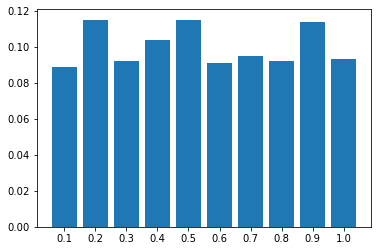

In [23]:
values = np.array(get_msm_values(3443565432, 1000))
x, y = get_hist(values, 10)
plt.bar(x, y)
plt.show()

Тестирование независимости

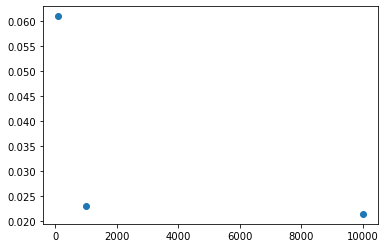

In [117]:
num = 3443565432
length = 100
x, y = list(), list()
s = 10
for i in range(3):
    values = np.array(get_msm_values(num, length))
    v1 = values[s:]
    v2 = values[:(-s)]
    x.append(length)
    y.append(scipy.stats.pearsonr(v1, v2)[0])
    length = length * 10
plt.plot(x, y, 'o')
plt.show()

Мультипликативный конгруэнтный метод

In [24]:
def next_val(m, k, prev):
    return (k * prev) % m


def multiplicative_congruent_method(m, k, a0):
    next = a0
    while True:
        yield next / m
        next = next_val(m, k, next)


def get_mcm_values(m, k, a0, n):
    gen = multiplicative_congruent_method(m, k, a0)
    return [next(gen) for i in range(n)]

Тестирование равномерности

In [25]:
m = 131072
k = 131101
a0 = 29

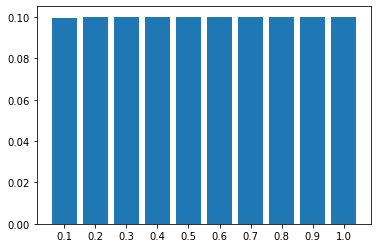

In [26]:
values = np.array(get_mcm_values(m, k, a0, 100000))
x, y = get_hist(values, 10)
plt.bar(x, y)
plt.show()

Тестирование независимости

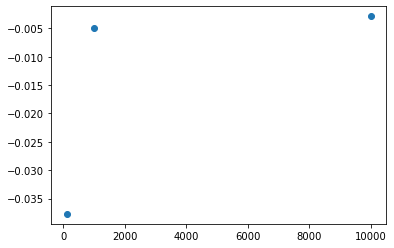

In [121]:
length = 100
x, y = list(), list()
s = 10
for i in range(3):
    values = np.array(get_mcm_values(m, k, a0, length))
    v1 = values[s:]
    v2 = values[:(-s)]
    x.append(length)
    y.append(scipy.stats.pearsonr(v1, v2)[0])
    length = length * 10
plt.plot(x, y, 'o')
plt.show()